# Part 1

**Pearson Correlation:**

Is a measurement that indicates how strong two variables are correlated, specifically, the degree of linear association between two variables. It also indicates if they have positive or negative correlation (proportional or inversely proportional). It ranges from -1 to 1, where 1 indicates a perfect positive correlation and -1 a perfect negative correlation. 

The equation is: 

$ r = \frac{N\sum{XY}-(\sum{X}\sum{Y})}{\sqrt{ [N\sum{x^2}-(\sum{x})^2 ][N\sum{y^2}-(\sum{y})^2 }]} $

And Pearson Correlation might give a wrong lecture on the data correlation if this one has another type of correlation, i.e. Non-linear correlation.
Or without going that far, on the other day example, where we had 4 different datasets with the same Pearson correlation. 


**Bar vs Histograms Plots**

Bar Charts are visual representations of *Categorical Data*. where each category is represented by a bar which the heigth is proportional to the values it represents. 
Histograms on the other hand are representations of *numerical data*, where the data is divided into intervals and the proportion of the data that fall into that interval are represented by the height.
In the coffee example, we could see that at the first visualisation it had a categorial representation where each country was a category. and the amount of coffee was the height of the category. 
In the second visual representation, we could see that instead of countries, it had different pre defined categories, where each category represented an ammount of coffee consumption. then the eight of each category was the number of countries that fell inside this consumtion. 



**Right bin-size in the histogram**

There are different methods to choose the right amount of bins for a histogram representaytion, some of them are: 

- Square-root choice: The square root of the number of observations in the data.

- Sturges' formula: The logarithm of the number of observations in the data. Eq:  1 + log2(N).  N= num of observations. 

- Freedman-Diaconis rule: Interquartile range (IQR) of the data. The number of bins is calculated as 2 x IQR / (N)^(1/3), where IQR is the difference between the third quartile and the first quartile of the data, and N is the number of observations in the data.

# Part 2

**Jitter Plot**

The jitter plot basicaaly shifts each point of the data set a random ammount so 2 points that have the same value, and thus, the point's won't lay in the same posistion and we could see how many points have a specific value. 

**Figure 2-3**

The figure in 2-3 explains the importance of how where we place the first bin on the histogram and the width of them can change the visual representation that we can get of them.

**When can KDE be misleading?**

There are some handicaps when trying to plot data with KDE.

- Sensitive to the choice of bandwidth: The bandwidth parameter controls the degree of smoothing in the density estimate. If the bandwidth is too small, the estimate can be too noisy, and if it is too large, the estimate can be oversmoothed and miss important features of the data. Selecting an appropriate bandwidth is crucial, and different methods exist to estimate it.

- Difficulty in interpreting modes and tails: The modes or peaks in the density plot can be difficult to interpret, particularly if they are close together. Also, the tails of the density plot may not be accurate, particularly if there are few data points in those regions.

- Not suitable for high-dimensional data: Kernel density estimation becomes computationally expensive in high-dimensional spaces, and requires a large amount of data to achieve reliable estimates. In such cases, other visualization techniques may be more appropriate.

**Intuitivity of CDF**
Cumulative density plots are less intuitive in the sense that you cannot get an exact picture of what's going on by just looking at the plot. While with bar plots and kernel distributions we can get an exact number of what are we aiming for. If we are interested in how probable is a specific event, a CDF won't clarify that. 
The point here is that each plot has a specific meaning, so depending on what we want to represent we can use one or another. 

**Quantile Plot and Probability plot** 
A quantile plot, also known as a probability plot, is the inverse of the cumulative distribution. It's basically used to check whether a probability distribution follows a specific distribution ot not. 
The most used case is to check if a specific distribution follows a gaussian distribution, as the inverse of the gaussian CDF it's a straight line, all the points that fall outside the straigth line will not follow a gaussian distribution. 

**Median, Mean and related summaries** 
When using the mean, median, or related measurements we can get a bad overview from the dataset as they could lead to misleading assumptions. 
Example; Categorical data with 3 values: 10, 20, 30.
We have 20 points with values 1 and 3, 10 each. and 20 points on value 2. when calculating the mean, we'll obtain the value of 20, when caclculating the median, we'll also obtain the value of 20, we could think that we have a gaussian distribution while we are truly dealing with categorical data. 

**Box Plots** 
- Want to identify central tendencies. 
- Box Plots are useful when dealing with categorical data and we want to visualize the distributions of the different categories (also when we want to compare distributions from different datasets)
- When we want identify potential outliers. 
- Displaying statistic summary like median, mean, quartiles... 


**Violin Plots** 
Violin plots displays the density distribution of the data by showing the density curve. They could be better when we know that our data follows a gaussian distibution and we want to get more insights on which kind of distributions they have. In general, we could also see the distributions in box plots, but we can get some visual support to double check our assumptions, as somtimes the statistical measurements could lead to misleadings. 

**Box plots vs Violin Plots** 
Violin plots can be more helpful to understand the data, as we said in the last point, as box plots are a visualization of statistical summary measurements, they coud lead to a misleading. Really different datasets can have same statistical summary mesurements which will have same box plot respresetnations. 


# Part 3

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv", index_col=False)

In [4]:
# choose one Crime Category 
cat = 'DRUG/NARCOTIC'
df_tmp = df[df.Category==cat][['PdId', 'Date', 'Time']]

In [5]:
# convert Date column into a datetime object. 
df_tmp['Date'] = pd.to_datetime(df_tmp['Date'], format="%m/%d/%Y")

In [6]:
from datetime import datetime
# Set the initial and final Date Time 
start = datetime.strptime('01/01/2006', "%m/%d/%Y")
end = datetime.strptime('02/01/2006', "%m/%d/%Y")

In [7]:
# Filter by date time and hour
df_def = df_tmp[(df_tmp.Date>start)&(df_tmp.Date<end)&(df_tmp.Time>'13:00')&(df_tmp.Time<='14:00')].sort_values('Time')

In [8]:
# Create a scatter plot jitter plot
normal = np.ones(len(df_def))+1
jitter = np.random.uniform(0, 1, size=len(df_def))

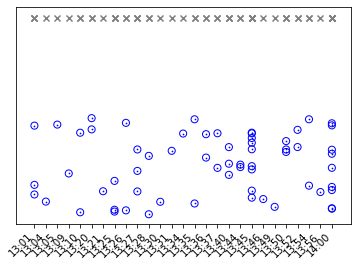

In [9]:
np.random.seed(0)
plt.scatter(df_def.Time, normal, marker="x", linewidths=0.5, c='gray')
plt.scatter(df_def.Time, jitter, 
            s=50,
            facecolors='none',
            edgecolors='b',
            linewidths=1)
plt.scatter(df_def.Time, jitter, 
            s=0.5,
            c='b')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.show()


In [10]:
df.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

In [11]:
cats = [cat, 'ASSAULT']
df_tmp = df[df.Category.isin(cats)]

In [12]:
from datetime import datetime
df_tmp['Date'] = pd.to_datetime(df_tmp['Date'], format="%m/%d/%Y")
# Set the initial and final Date Time 
start = datetime.strptime('01/01/2006', "%m/%d/%Y")
end = datetime.strptime('04/01/2006', "%m/%d/%Y")
df_lat = df_tmp[(df_tmp.Date>start)&(df_tmp.Date<end)&(df_tmp.Time>'10:00')&(df_tmp.Time<='20:00')].sort_values('Time')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


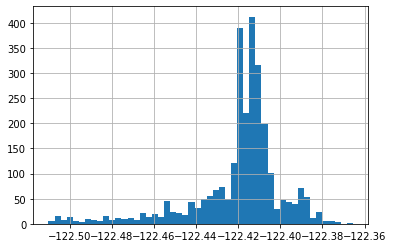

In [13]:
df_lat['X'].hist(bins=50)

In [19]:
type(df_def['Time'][1727398])

str

In [21]:
df_def['Time'] = pd.to_datetime(df_def['Time'], format= '%H:%M' ).dt.time

In [45]:
val = []
for idx in df_def['Time']:
    val.append(idx.minute)

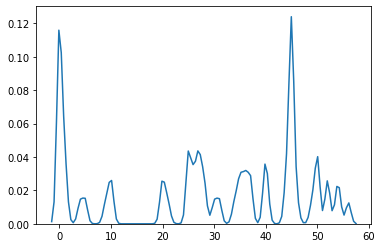

In [46]:
sns.kdeplot(np.array(val), bw=0.5)

In [47]:
df_lat['Time'] = pd.to_datetime(df_lat['Time'], format= '%H:%M' ).dt.time

val = []
for idx in df_lat.sample(n=25)['Time']:
    val.append(idx.minute)



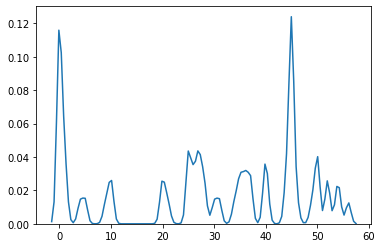

In [48]:
sns.kdeplot(np.array(val2), bw=0.5)